In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('census.csv',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'])
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       target  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital-gain  capital-loss  hours-per-week  native-country  target  
0     Male          2174             0              40   United-States   <=50K  
1     Male             0             0              13   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3     Male             0             0              40   United-States   <=50K  
4   Female             0             0              40            Cuba   <=50K  
5   Female             0             0              40   United-States   <=50K  
6   Female             0             0              16         Jamaica   <=50K  
7     Male             0             0              45   United-States    >50K  
8   Female         14084             0              50   United-States    >50K  
9     Male          5178             0              40   United-States    >50K

In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(32561, 15)

In [5]:
#features in data
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Are there any missing values?
df.isna().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [8]:
#Lets describe the dataset
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

mean is greater than median means outliers are present and data could be right skewed.

In [9]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of age : 73
number of unique valuse of workclass : 9
number of unique valuse of fnlwgt : 21648
number of unique valuse of education : 16
number of unique valuse of education-num : 16
number of unique valuse of marital-status : 7
number of unique valuse of occupation : 15
number of unique valuse of relationship : 6
number of unique valuse of race : 5
number of unique valuse of sex : 2
number of unique valuse of capital-gain : 119
number of unique valuse of capital-loss : 92
number of unique valuse of hours-per-week : 94
number of unique valuse of native-country : 42
number of unique valuse of target : 2


In [10]:
#Converting target to Numeric Form
#dff['Income'] = dff['Income'].apply(lambda x: 1 if x==' >50K.' else 0)
df['target'] = df.target.map({' <=50K': 0, ' >50K': 1})
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       target  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
32556       0  
32557       1  
32558       0  
32559       0  
32560       1  

[32561 rows x 15 columns]

In [24]:
edit_cols = ['native-country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    df.loc[df[col] == '?', col] = 'unknown'

In [25]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")


? in native-country: 0
? in occupation: 0
? in workclass: 0


# Univariate  Analysis

In [11]:
# Let's find out how many of each class there
df['target'].value_counts()

0    24720
1     7841
Name: target, dtype: int64

In [12]:
#target percentage in dataset
print('Percentage',df.target.value_counts(normalize=True))

Percentage 0    0.75919
1    0.24081
Name: target, dtype: float64


Text(0.5, 6.79999999999999, 'target')

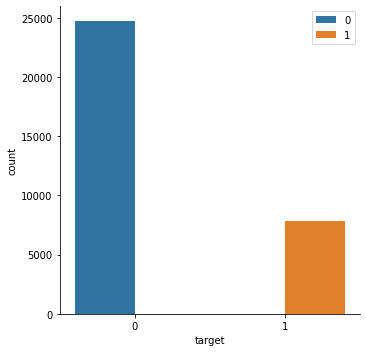

In [13]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='target',data=df,kind='count',hue='target')
plt.legend()
plt.xlabel("target")

Here  we see classes are imbalanced and there are less no of  persons who  makes over 50K a year

Text(0.5, 6.79999999999999, 'sex')

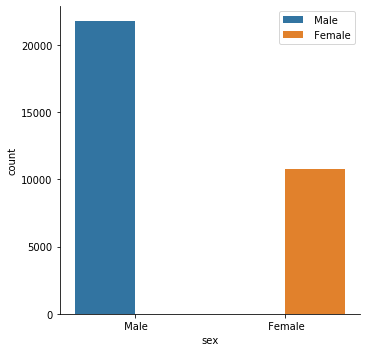

In [14]:
#Lets check the count of each class in sex varaible
%matplotlib inline
sns.catplot(x='sex',data=df,kind='count',hue='sex')
plt.legend()
plt.xlabel("sex")

Male are greater than female.

Text(0.5, 0, 'race')

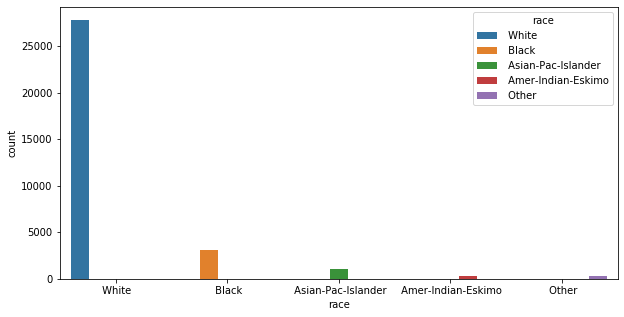

In [15]:
#Lets check the count of each class in race varaible
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x='race',data=df,hue='race')
plt.xlabel("race")


In [34]:
# Exploring Case when capital-gain and capital-loss both are greater than zero.

capital_loss_df = df[df['capital-loss']>0]
capital_gain_df = df[df['capital-gain']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(df.loc[df['capital-gain'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(df.loc[df['capital-loss'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (1519, 15)
Number of observations in capital gain dataset above median value: (2712, 15)
Percentage of people having capital gain greater than median value: 8.3290%
Percentage of people having capital loss greater than median value: 4.6651%


In [39]:
# Exploring Case when capital-gain and capital-loss both are zero. As this category of people are more in our dataset.
cat_col = df.dtypes[df.dtypes == 'object']

print(f"Number of observations having capital gain and capital loss zero: {df[(df['capital-loss'] == 0) & (df['capital-gain'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(df[(df['capital-loss'] == 0) & (df['capital-gain'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (28330, 15)
================================workclass=================================
 Private             19982
 Self-emp-not-inc     2128
 Local-gov            1772
 ?                    1655
 State-gov            1134
 Self-emp-inc          832
 Federal-gov           808
 Without-pay            12
 Never-worked            7
Name: workclass, dtype: int64
================================education=================================
 HS-grad         9415
 Some-college    6533
 Bachelors       4384
 Masters         1300
 Assoc-voc       1194
 11th            1089
 Assoc-acdm       930
 10th             865
 7th-8th          582
 9th              474
 12th             403
 Prof-school      363
 5th-6th          308
 Doctorate        284
 1st-4th          159
 Preschool         47
Name: education, dtype: int64
================================marital-status=================================
 Married-civ-spouse       12199
 Neve

Number of observations having capital gain and capital loss zero: (28330, 15)
So 88% of people in our dataset has capital gain and loss = 0
This concludes capital gain and capital loss are highly skewed features and even have outliers which need to be taken care of.
Workclass contains unknown values.

age                  AxesSubplot(0.125,0.772143;0.168478x0.107857)
fnlwgt            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
education-num     AxesSubplot(0.529348,0.772143;0.168478x0.107857)
capital-gain      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
capital-loss         AxesSubplot(0.125,0.642714;0.168478x0.107857)
hours-per-week    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
target            AxesSubplot(0.529348,0.642714;0.168478x0.107857)
dtype: object

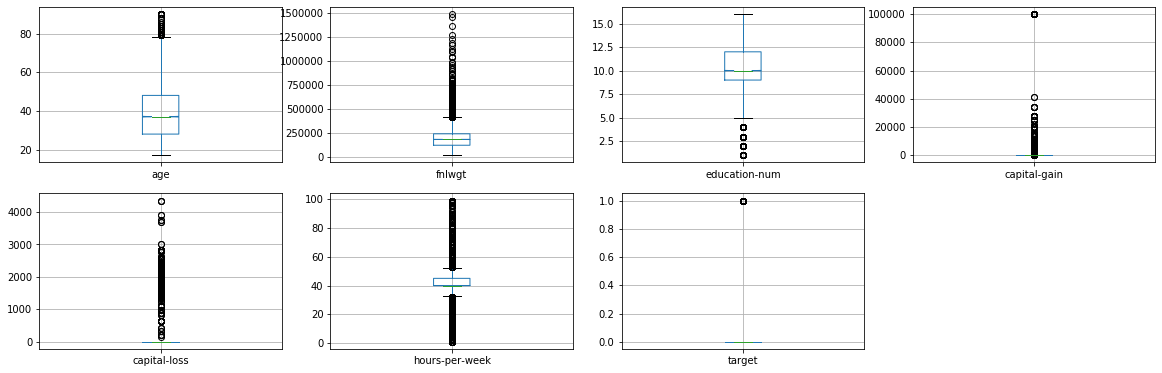

In [26]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True)

age: In our dataset People from age group of 18 to 50 can be observed.
hours per week: Generally people can be seen working for 30 hours to 40 hours per week.
education: people above 8th grade are more in our dataset.
Our dataset is highly skewed and we should consider scaling it for better performance of our models.

# Bivarient  Analysis


In [40]:
#sex vs target
df.sex.value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

#  target column, 1 = >50K, 0 = <=50K'

In [41]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex      Female   Male
target                
0          9592  15128
1          1179   6662

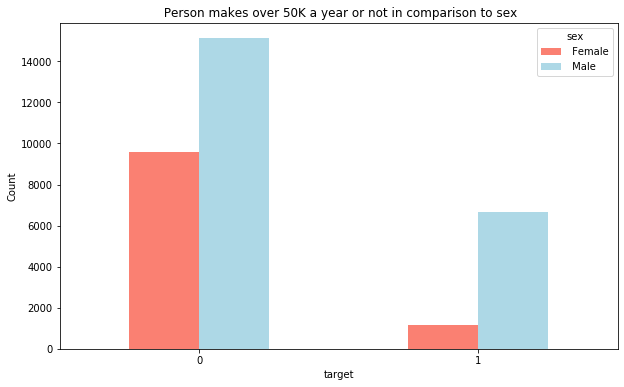

In [42]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
plt.title(" Person makes over 50K a year or not in comparison to sex")
plt.xlabel("target")
plt.ylabel("Count")
plt.xticks(rotation=0);

female makes over 50k a year than men

In [43]:
# Compare target column with race column
pd.crosstab(df.target, df.race)

race     Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
target                                                                  
0                       275                  763    2737     246   20699
1                        36                  276     387      25    7117

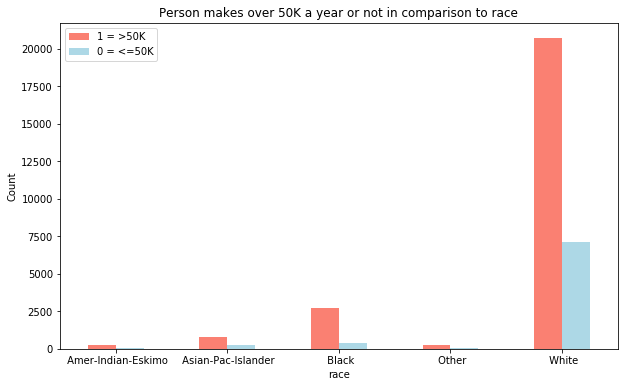

In [44]:
# Create a plot of crosstab
pd.crosstab(df.race, df.target).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Person makes over 50K a year or not in comparison to race")
plt.xlabel("race")
plt.ylabel("Count")
plt.legend(["1 = >50K","0 = <=50K"]);
plt.xticks(rotation=0);

white peoples and asain-pac-Islander earn over 50k a year than others 


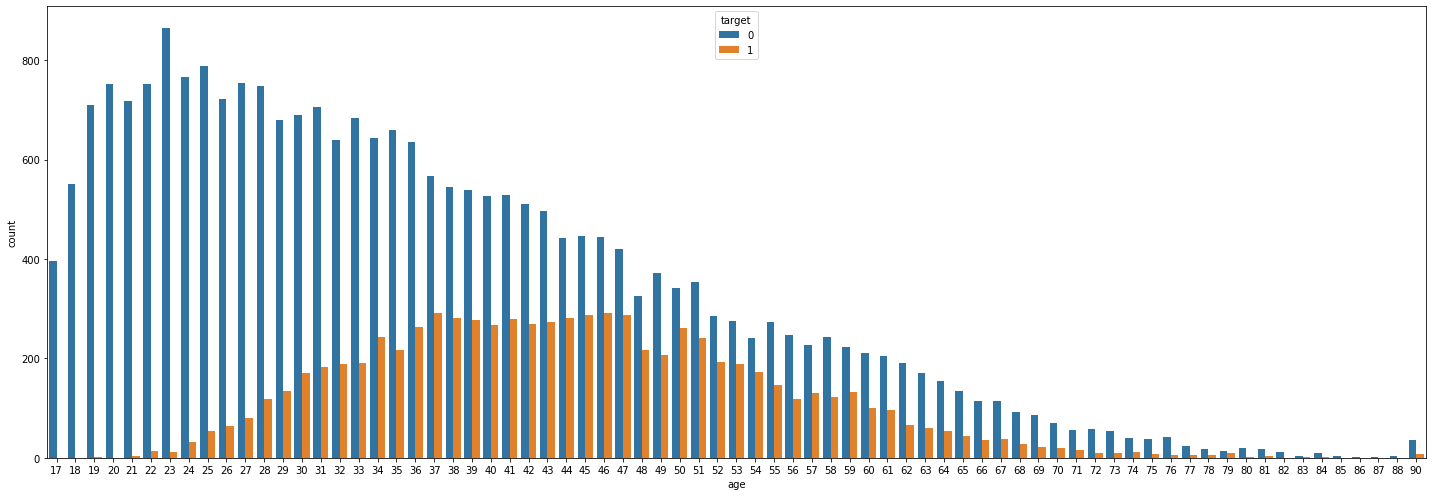

In [45]:
#age comparison in respect to target
plt.figure(figsize=(20,7))
sns.countplot(x='age',hue="target",data=df);
plt.tight_layout()

 We can see that as age increases number of persons getting salary less than 50K increases and then it decreases ,so it means   that freshers get less salary in the starting and as they gain experience they get more salary upto a certain age after that   further increse in age leads to retirement and all that, thus reducing number of persons getting high salary.

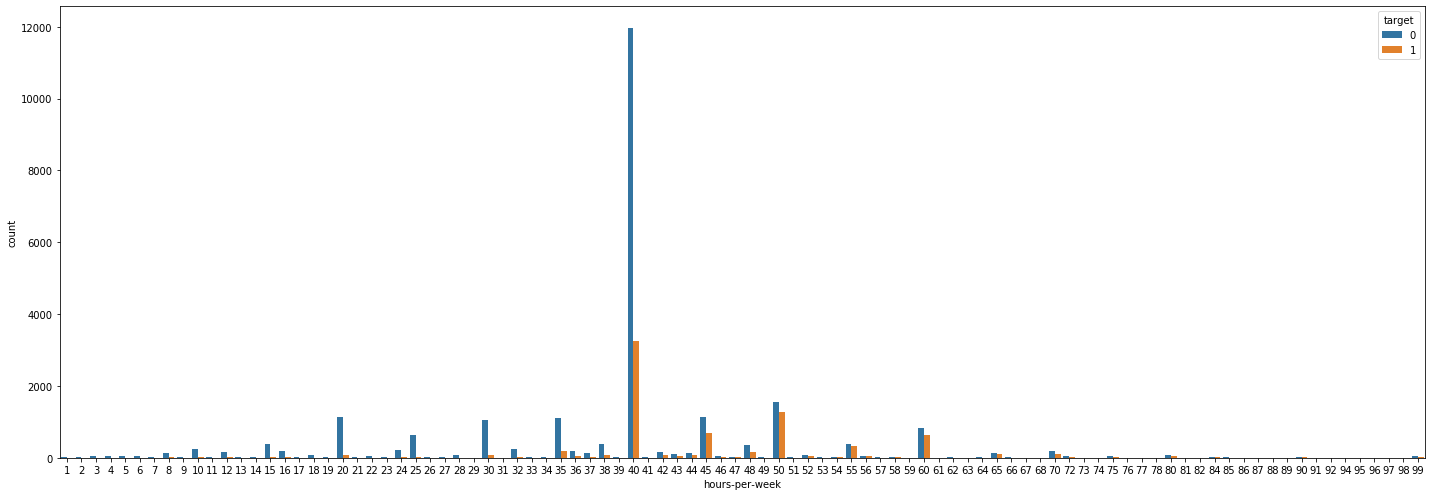

In [46]:
#hours per week comparison in respect to target
plt.figure(figsize=(20,7))
sns.countplot(x='hours-per-week',hue="target",data=df);
plt.tight_layout()

More number of persons work for 40 hours a week for earnings

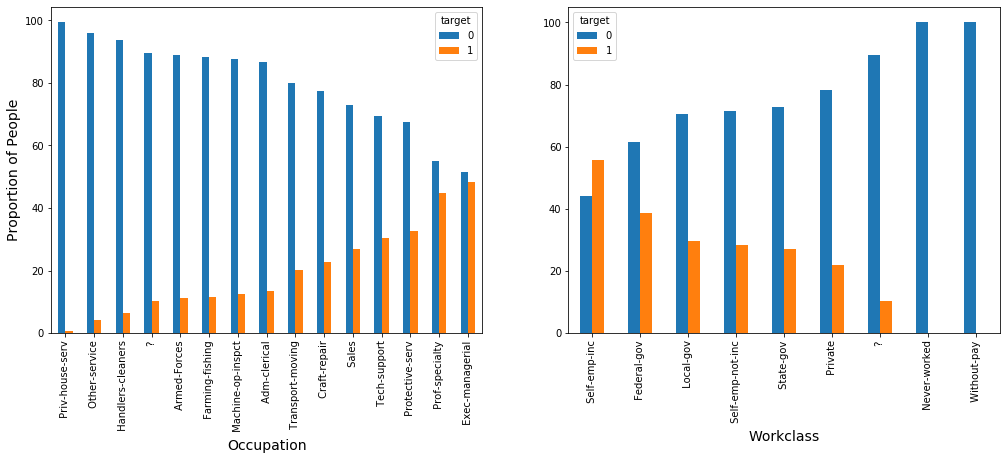

In [57]:
table_occu = pd.crosstab(df['occupation'], df['target'])
table_workclass = pd.crosstab(df['workclass'], df['target'])
table_edu = pd.crosstab(df['education'], df['target'])
table_marital = pd.crosstab(df['marital-status'], df['target'])
table_country = pd.crosstab(df['native-country'], df['target'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= 1).plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);



Occupation
=>Adm-clerical occupation have more number of employment but persons who earns money more than 50K are more in Exec-Managerial   occupation and after Exec_Manegerial it is Prof-Speciality occupation where people with salary more than 50K exists.
=>People with salary less than 50K are more in Adm-Clerical occupation and then in craft-repair occupation.

Workclass
=> More people works in Private Sector.
=> Private Sector have more number of persons where salary is less than 50K and more than 50K than the rest.

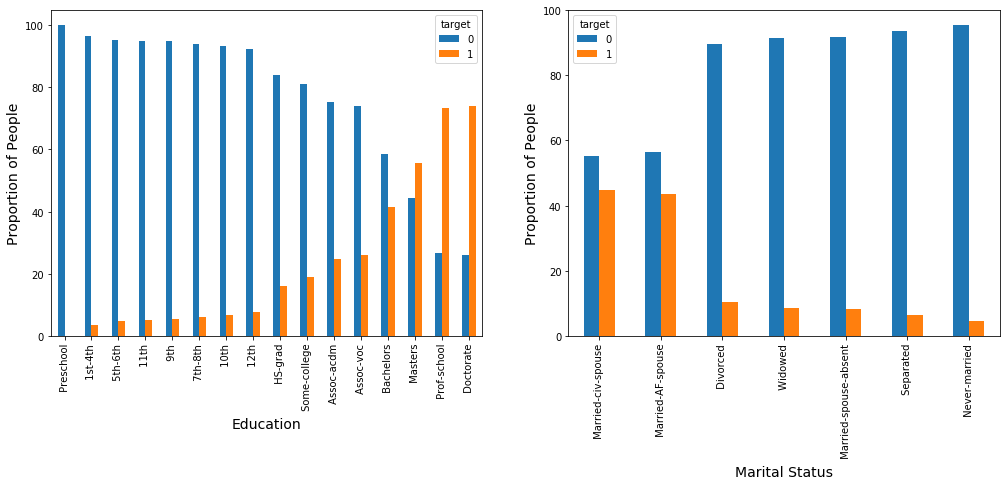

In [59]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = 1).plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = 0).plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Education:
People having degree doctorate,prof-school,masters are making salary more than 50K.
Maritial Status:
married people earn more than 50k salary.

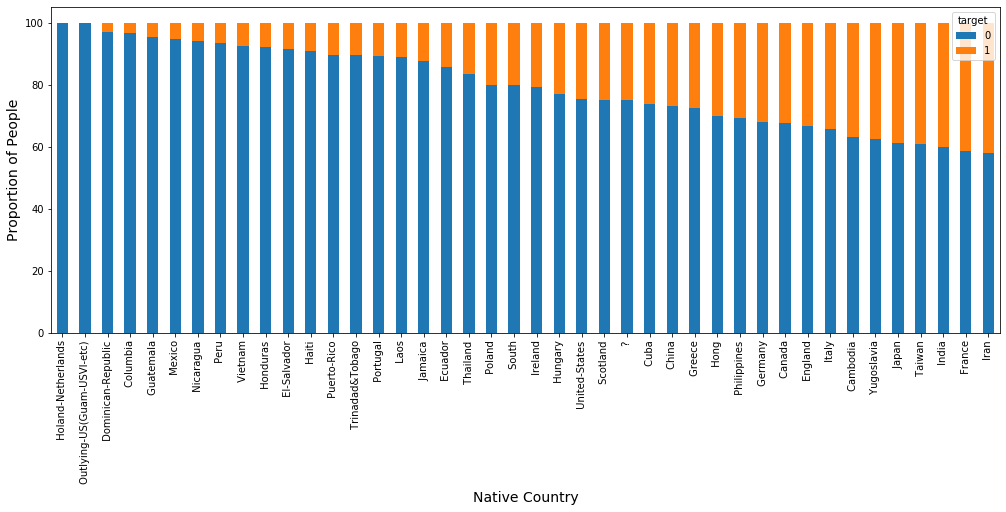

In [65]:
table_country = pd.crosstab(df['native-country'], df['target'])
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = 1).plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


Iran country people earn above 50k respect to other country

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List1=['sex','workclass','education','marital-status','occupation','relationship','race','native-country']
for i in List1:
    df[i]=le.fit_transform(df[i].astype(str))
df

age  workclass  fnlwgt  education  education-num  marital-status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               1             1     4    1          2174             0   
1               4             0     4    1             0             0   
2               6             1     4    1             0             0   
3               6             0     2    1             0             0   
4              10             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          13             5     4    0             0             0   
32557           7             0     4    1             0             0   
32558           1             4     4    0             0             0   
32559           1             3     4    1             0             0   
32560           4             5     4    0         15024             0   

       hours-per-week  native-country  target  
0                  40              39       0  
1                  13              39       0  
2                  40              39       0  
3                  40              39       0  
4                  40               5       0  
...               ...             ...     ...  
32556              38              39       0  
32557              40              39       1  
32558              40              39       0  
32559              20              39       0  
32560              40              39       1  

[32561 rows x 15 columns]

In [67]:
#lets check skewness
df.skew()

age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education-num     -0.311676
marital-status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
native-country    -3.658303
target             1.212430
dtype: float64

In [69]:
#lets remove the skewness
for i in df.drop(['target'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])


In [70]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_census=df.loc[(z<3).all(axis=1)]
print(df_census.shape)#shape of dataset after outliers removed

(32561, 15)
(26273, 15)


In [71]:
df_census.skew()

age               -0.061005
workclass         -0.435492
fnlwgt            -0.386253
education          0.130726
education-num     -0.150856
marital-status    -0.098637
occupation         0.136094
relationship       0.184573
race              -2.072238
sex               -0.635602
capital-gain      17.971885
capital-loss       0.000000
hours-per-week    -0.359110
native-country    -4.598469
target             1.585522
dtype: float64

In [72]:
for i in df_census.drop(['target'],axis=1).columns:
    if df_census.skew().loc[i]>0.55:
        df_census[i]=np.log1p(df_census[i])
    if df_census.skew().loc[i]<-0.5:
        df_census[i]=np.square(df_census[i])

In [73]:
df_census.skew()

age               -0.061005
workclass         -0.435492
fnlwgt            -0.386253
education          0.130726
education-num     -0.150856
marital-status    -0.098637
occupation         0.136094
relationship       0.184573
race              -2.055154
sex               -0.635602
capital-gain      17.945387
capital-loss       0.000000
hours-per-week    -0.359110
native-country    -4.087197
target             1.585522
dtype: float64

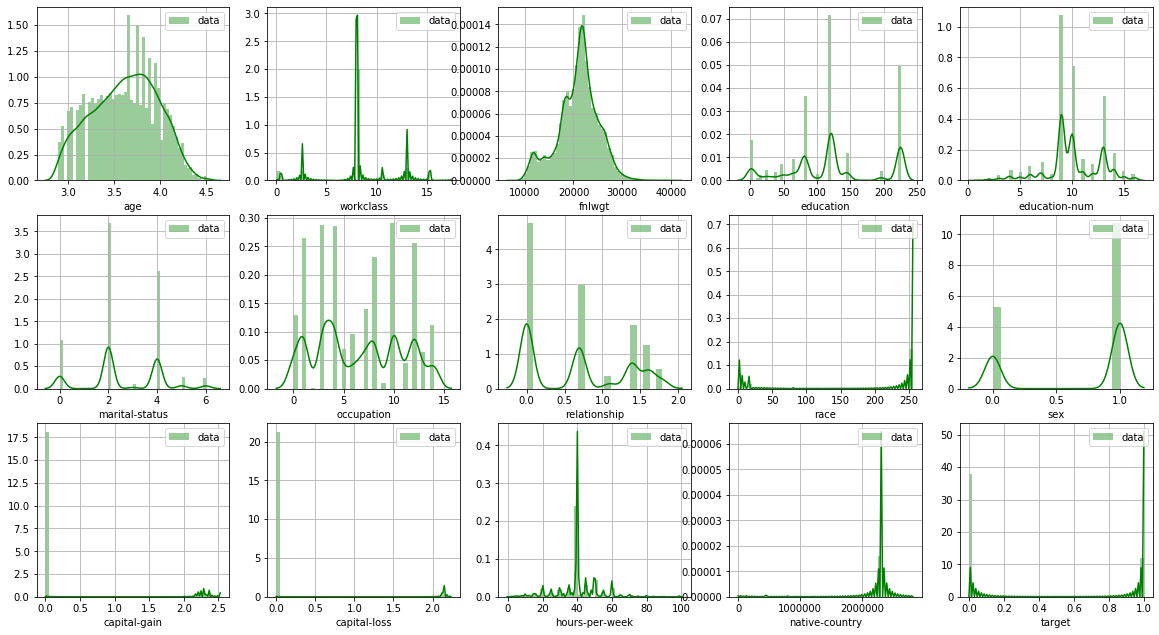

In [74]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,30))
for i,col in enumerate(list(df_census.columns.values)):
    plt.subplot(8,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

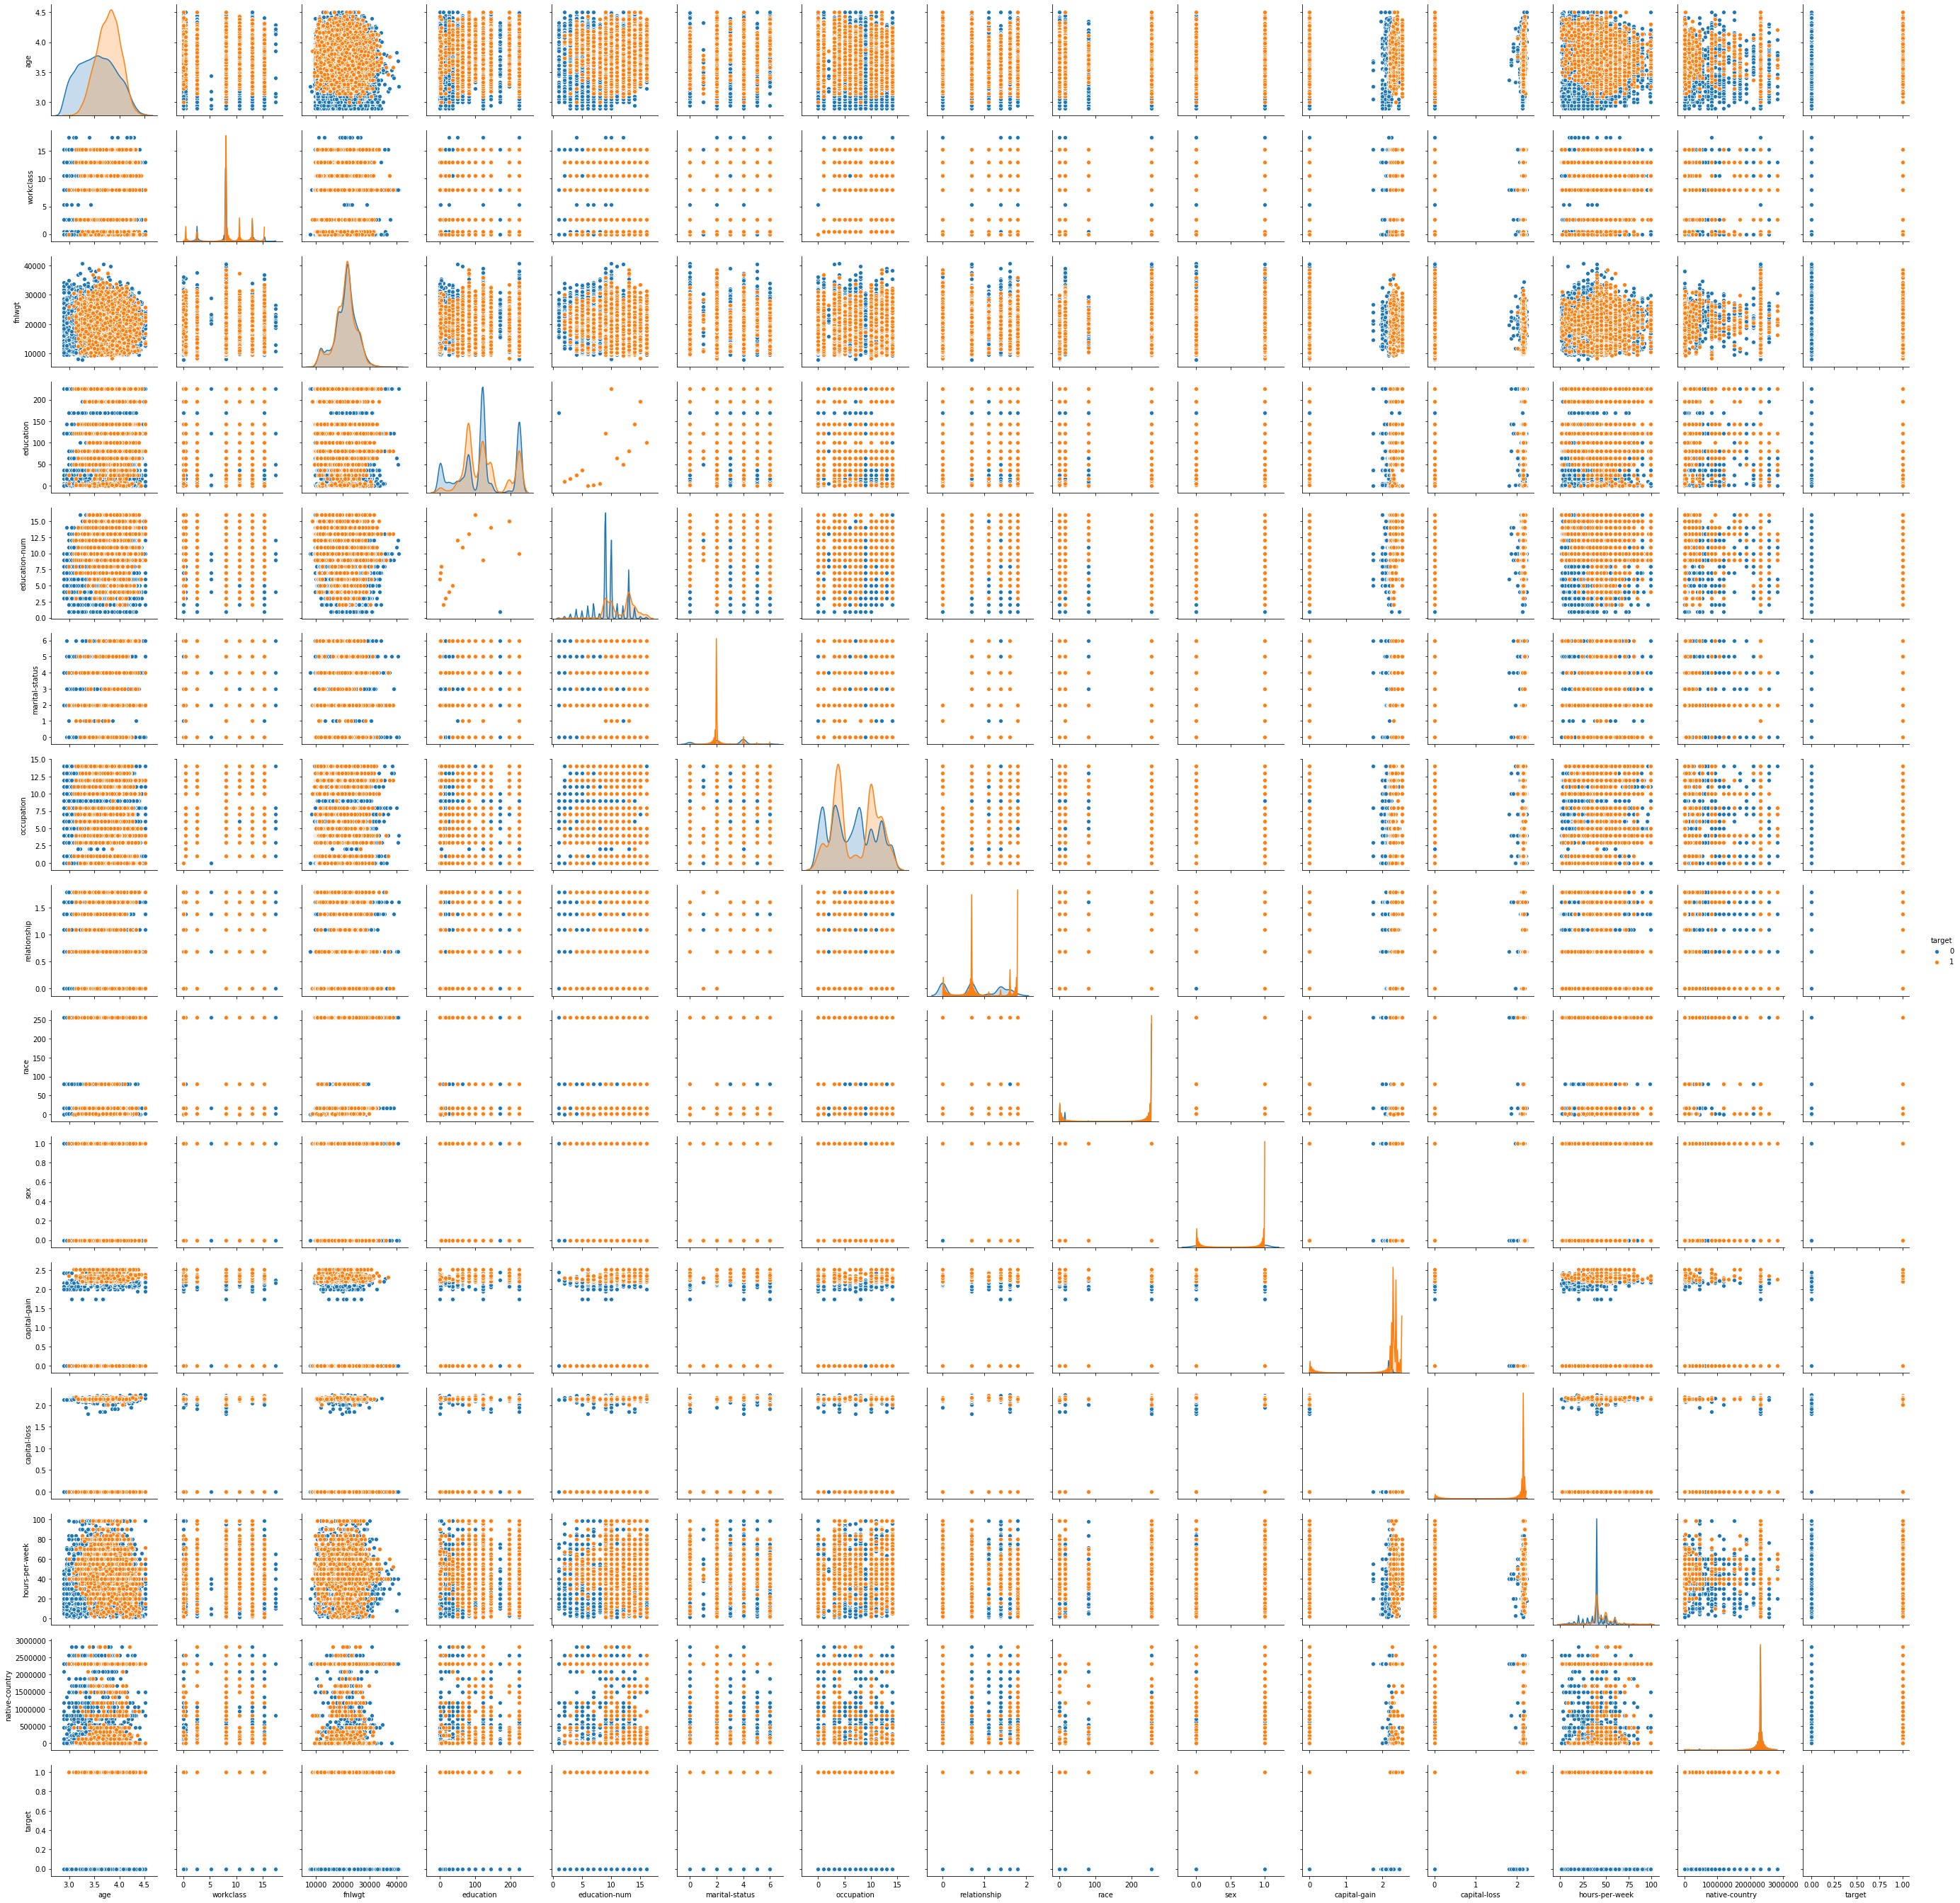

In [75]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,hue='target')

(15.0, 0.0)

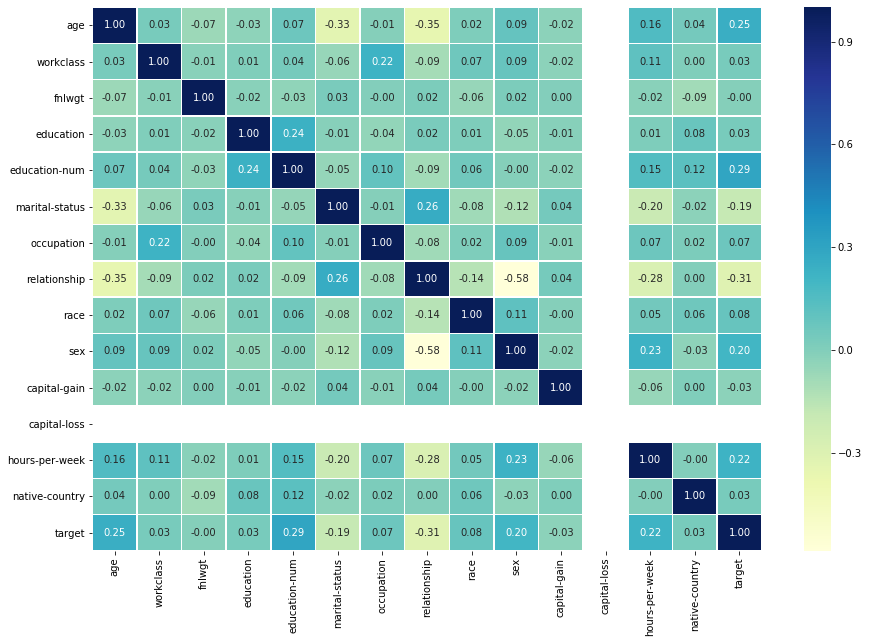

In [76]:
# Plotting Heatmap for Correlation
corr_matrix = df_census.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [77]:
#Feature Removal

#education num and education are giving similar information
#relationship and marital status imply similar information.Hence keeping only one of the two.

print(f"Number of columns before deleting: {df_census.shape[1]}")
del_cols = ['relationship','education-num']
df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_census.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 15


# Modeling


In [78]:
# Split data into X and y
X = df_census.drop("target", axis=1)

y = df_census["target"]

In [79]:
# Independent variables (no target column)
X.head()

age  workclass        fnlwgt  education  education-num  \
1  3.931826  13.038728  16480.598408         81             13   
2  3.663562   8.027098  22750.515172        121              9   
3  3.988984   8.027098  23385.089691          1              7   
5  3.637586   8.027098  24876.532383        144             14   
6  3.912023   8.027098  20626.340873         36              5   

   marital-status  occupation  relationship   race  sex  capital-gain  \
1               2           4      0.000000  65536    1           0.0   
2               0           6      0.693147  65536    1           0.0   
3               2           6      0.000000    256    1           0.0   
5               2           4      1.791759  65536    0           0.0   
6               3           8      0.693147    256    0           0.0   

   capital-loss  hours-per-week  native-country  
1           0.0              13       480009665  
2           0.0              40       480009665  
3           0.0              40       480009665  
5           0.0              40       480009665  
6           0.0              16      1001573953

In [80]:
# Target variable
y


1        0
2        0
3        0
5        0
6        0
        ..
32555    0
32556    0
32557    1
32558    0
32559    0
Name: target, Length: 26273, dtype: int64

In [81]:
#checking shape of input variable
X.shape

(26273, 14)

In [82]:
#checking shape of target variable
y.shape

(26273,)

In [83]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

age  workclass    fnlwgt  education  education-num  \
0      0.953135   1.568013 -1.076637  -0.589787       1.263079   
1      0.194593   0.086018  0.445300  -0.013544      -0.412967   
2      1.114756   0.086018  0.599334  -1.742273      -1.250990   
3      0.121145   0.086018  0.961361   0.317796       1.682090   
4      0.897141   0.086018 -0.070315  -1.238061      -2.089013   
...         ...        ...       ...        ...            ...   
26268 -1.298568   0.086018  1.128548   1.484688       0.006044   
26269 -0.742351   0.086018  0.769874  -1.050782       0.844067   
26270  0.336003   0.086018 -0.131800  -0.013544      -0.412967   
26271  1.365149   0.086018 -0.158387  -0.013544      -0.412967   
26272 -1.298568   0.086018  0.324186  -0.013544      -0.412967   

       marital-status  occupation  relationship      race       sex  \
0           -0.425974   -0.589684     -1.111145  0.406475  0.731496   
1           -1.725437   -0.119572     -0.037527  0.406475  0.731496   
2           -0.425974   -0.119572     -1.111145 -2.469434  0.731496   
3           -0.425974   -0.589684      1.664118  0.406475 -1.367062   
4            0.223757    0.350540     -0.037527 -2.469434 -1.367062   
...               ...         ...           ...       ...       ...   
26268        0.873489    1.055707     -0.037527  0.406475  0.731496   
26269       -0.425974    1.525819      1.664118  0.406475 -1.367062   
26270       -0.425974    0.115484     -1.111145  0.406475  0.731496   
26271        2.172952   -1.294852      1.381719  0.406475 -1.367062   
26272        0.873489   -1.294852      1.036092  0.406475  0.731496   

       capital-gain  capital-loss  hours-per-week  native-country  
0         -0.055592           0.0       -2.370284        0.153585  
1         -0.055592           0.0        0.038324        0.153585  
2         -0.055592           0.0        0.038324        0.153585  
3         -0.055592           0.0        0.038324        0.153585  
4         -0.055592           0.0       -2.102661        1.516471  
...             ...           ...             ...             ...  
26268     -0.055592           0.0        0.038324        0.153585  
26269     -0.055592           0.0       -0.140091        0.153585  
26270     -0.055592           0.0        0.038324        0.153585  
26271     -0.055592           0.0        0.038324        0.153585  
26272     -0.055592           0.0       -1.745830        0.153585  

[26273 rows x 14 columns]

In [84]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [85]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [86]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 79 is: 0.8445290199809705
max acc score corresponding to 99 is: 0.8428163653663178
max acc score corresponding to 62 is: 0.8517602283539486
max acc score corresponding to 62 is: 0.33035204567078974
max acc score corresponding to 97 is: 0.8532825880114177
max acc score corresponding to 62 is: 0.813510941960038
max acc score corresponding to 86 is: 0.8648905803996194
max acc score corresponding to 62 is: 0.8605137963843958
max acc score corresponding to 97 is: 0.8648905803996194


{'Logistic Regression': 0.8391378818155867,
 'KNN': 0.885764582738605,
 'Random Forest': 0.9874869159767818,
 'GaussianNB': 0.3137310876391664,
 'SVC': 0.8503663526501094,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.8651156151869825,
 'XGBClassifier': 0.9077457417451708,
 'AdaBoostClassifier': 0.8586925492435056}

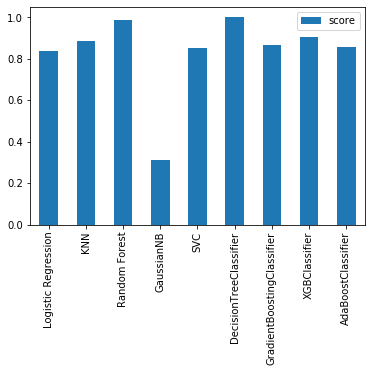

In [87]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 97 is: 0.8532825880114177
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy Score= 0.8532825880114177


Cross_val_score= 0.8468011699059461


roc_auc_score =  0.6753409064099842


Classification report
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4260
           1       0.70      0.39      0.50       995

    accuracy                           0.85      5255
   macro avg       0.79      0.68      0.71      5255
weighted avg       0.84      0.85      0.84      5255



[[4097  163]
 [ 608  387]]





******************** Random Forest *********************


max acc score corresponding to 97 is: 0.8574690770694576
RandomForestClassifier(bootstrap=True

Cross_val_score= 0.855137153942709


roc_auc_score =  0.7240958312690211


Classification report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4260
           1       0.70      0.50      0.58       995

    accuracy                           0.86      5255
   macro avg       0.80      0.72      0.75      5255
weighted avg       0.85      0.86      0.86      5255



[[4050  210]
 [ 500  495]]







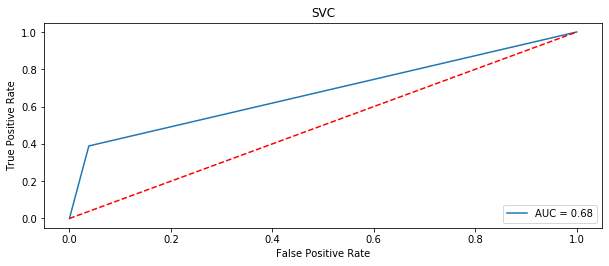

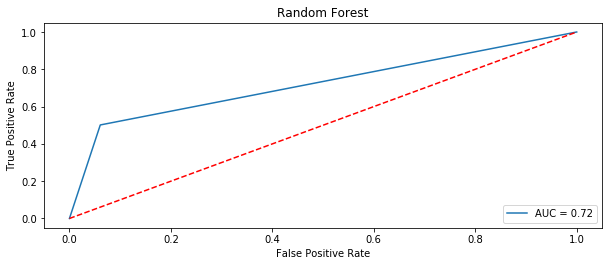

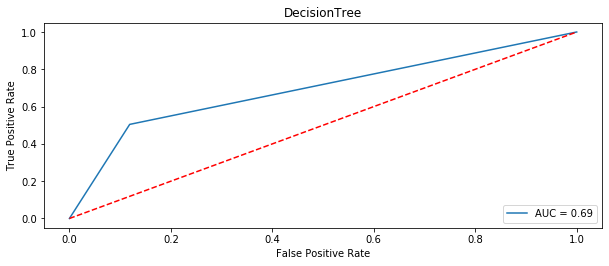

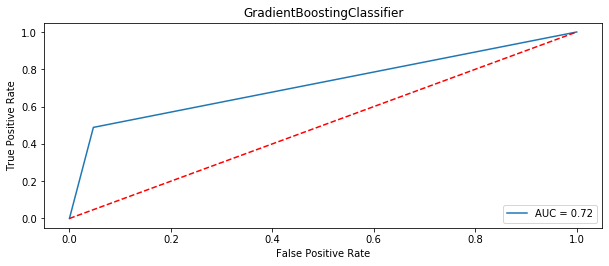

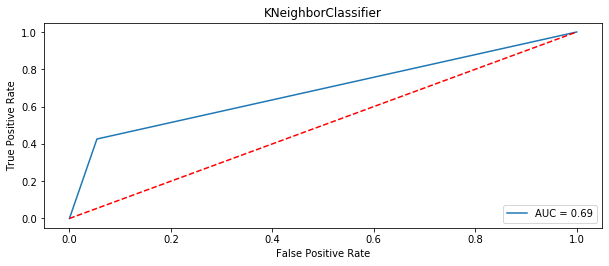

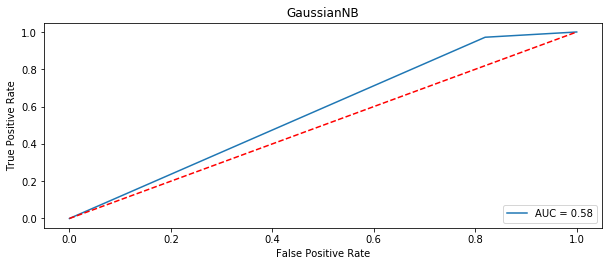

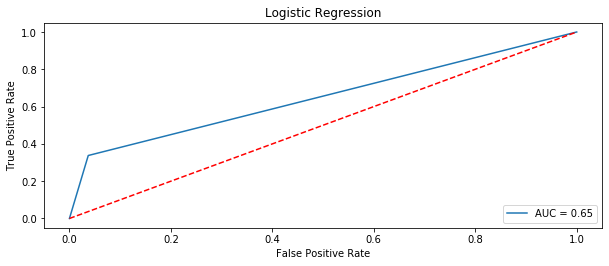

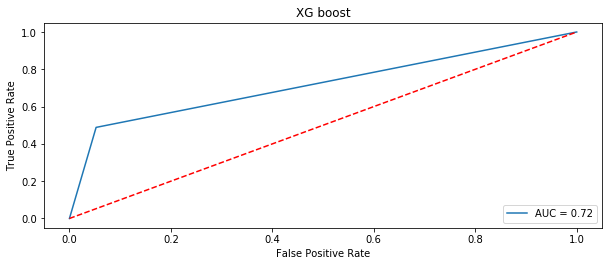

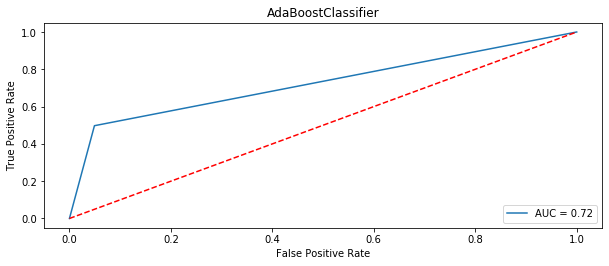

In [88]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [89]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

Model  accuracy_score  Cross_val_score  Roc_auc_curve
0                         SVC       85.328259        84.680117      67.534091
1               Random Forest       85.632731        84.722010      72.035471
2                DecisionTree       80.989534        79.815769      69.287164
3  GradientBoostingClassifier       86.489058        85.894306      72.062956
4         KNeighborClassifier       84.738344        83.747571      68.595265
5                  GaussianNB       33.035205        31.834979      57.618786
6         Logistic Regression       84.452902        83.778063      65.029962
7                    XG boost       86.051380        85.304321      71.793003
8          AdaBoostClassifier       86.489058        85.513715      72.409583

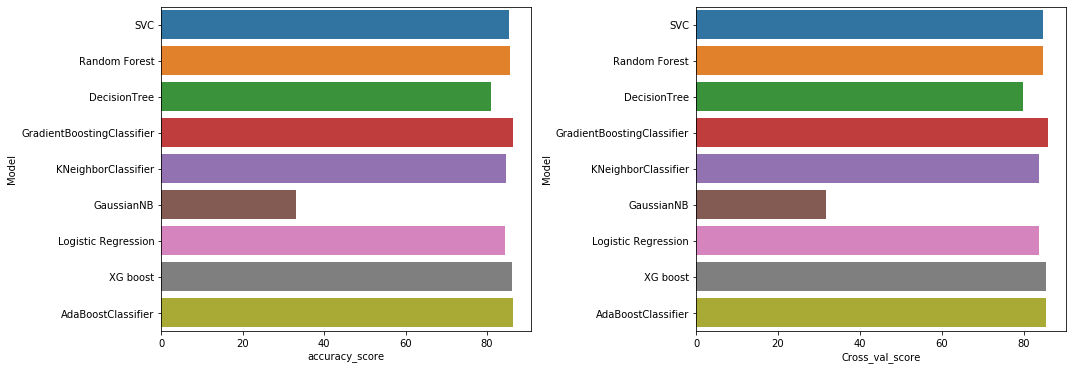

In [90]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [91]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV

In [92]:
#for getting best set of parameters for LogisticRegression we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridR = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}


clfR = LogisticRegression()

# Setup GridSearchCV
gs_clfR = GridSearchCV(estimator=clfR,
                      param_grid=gridR,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfR.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.0001, solver=liblinear ......................................
[CV] ....................... C=0.0001, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.00026366508987303583, solver=liblinear ......................
[CV] ....... C=0.00026366508987303583, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, solver=liblinear .......................
[CV] ........ C=0.0006951927961775605, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, solver=liblinear .......................
[CV] ........ C=0.0006951927961775605, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, solver=liblinear .......................
[CV] ........ C=0.0006951927961775605, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, solver=liblinear .......................
[CV] ........ C=0.0006951927961775605, solver=liblinear, total=   0.0s
[CV] C=0.0006951927961775605, solver=liblinear .......................
[CV] .

[CV] ........... C=29.763514416313132, solver=liblinear, total=   0.1s
[CV] C=29.763514416313132, solver=liblinear ..........................
[CV] ........... C=29.763514416313132, solver=liblinear, total=   0.1s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.1s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.1s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.1s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.1s
[CV] C=78.47599703514607, solver=liblinear ...........................
[CV] ............ C=78.47599703514607, solver=liblinear, total=   0.1s
[CV] C=206.913808111479, solver=liblinear ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished


In [93]:
# best parameters for LogisticRegression
print("Best parameter:",gs_clfR.best_params_)
print("score:",gs_clfR.best_score_)

Best parameter: {'C': 0.012742749857031334, 'solver': 'liblinear'}
score: 0.8377105338281473


In [94]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfR = LogisticRegression(C= 0.012742749857031334, solver='liblinear')
maxrandomcore(clfR,x,y)

max acc score corresponding to 79 is: 0.8443387250237868


79

In [95]:
#use gridsearchcv to find out best parameters for KNeighborsClassifier
grid_1={'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
# Setup GridSearchCV
gs_clf1 = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,
                      n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf1.fit(x_train, y_train);


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   46.1s finished


In [96]:
# best parameters for KNeighborsClassifier
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
score: 0.8441335997716243


In [97]:
#checking accuracy score using best parameters which calculated from gridsearchCV
knn=KNeighborsClassifier(metric='manhattan', n_neighbors= 19, weights= 'uniform')
maxrandomcore(knn,x,y)

max acc score corresponding to 48 is: 0.8578496669838249


48

In [100]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500, 100,100],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   5.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   5.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   5.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   5.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   5.5s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   1.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   5.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   1.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   2.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   2.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   2.5s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   2.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   4.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   3.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   3.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   3.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   3.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.8s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 10.8min finished


In [101]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 500}
score: 0.8539347226187077


In [114]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=500,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6)
maxrandomcore(rf,x,y)

max acc score corresponding to 97 is: 0.863558515699334


97

In [103]:
#lets use gridsearchcv to find out best parameters for GradientBoostingClassifier
grid_3 = {
    "learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]
    }
clf = GradientBoostingClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


In [104]:
# best parameters for GradientBoostingClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 100}
score: 0.8561709011323627


In [115]:
#checking accuracy score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(learning_rate= 0.1,n_estimators=100)
maxrandomcore(gb,x,y)

max acc score corresponding to 86 is: 0.8648905803996194


86

In [106]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=1, gamma=0.001, total=   4.2s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   4.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   4.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   4.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   4.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   4.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   4.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   4.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.4min finished


In [107]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 1000, 'gamma': 0.001}
score: 0.8425635169854411


In [108]:
svc=SVC(C=1000,gamma=0.001)
maxrandomcore(svc,x,y)

max acc score corresponding to 43 is: 0.849476688867745


43

In [109]:
#lets use gridsearchcv to find out best parameters for XGBClassifier
grid_3 = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.3,0.1,0.08], #so called `eta` value
              'max_depth': range(3,10,2),
              'min_child_weight': range(1,6,2),
              'silent': [1,0],
              'subsample': [0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree': [0.7],
              'n_estimators': [5,20,50], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]
         }
clf = XGBClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learni

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learni

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learnin

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learnin

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rat

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, ma

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_c

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9,

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.3, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_c

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_c

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_dept

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, 

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1,

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.3s
[CV] colsample_bytree=0.7, learning_

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.0

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=3, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.0s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_dep

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=5, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.3s
[CV] colsample_bytree=0.7, learnin

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7,

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.4s
[CV] colsample_bytree=0.7, learning_ra

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=7, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_dept

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=1, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.1s
[CV] colsample_bytree=0.7, learning_r

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rat

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.5, total=   0.5s
[CV] colsample_bytree=0.7, learn

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.7s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=3, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.6, total=   0.1s
[CV] colsample_bytree=0.7, learning

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9,

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9, total=   0.1s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, ma

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.7, total=   0.2s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.5, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.6, total=   0.3s
[CV] colsample_bytree=0.7, lea

[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=20, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=1 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_dep

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.9, total=   0.6s
[CV] colsample_bytree=0.7, lea

[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7 
[CV]  colsample_bytree=0.7, learning_rate=0.08, max_depth=9, min_child_weight=5, missing=-999, n_estimators=50, nthread=4, objective=binary:logistic, seed=1337, silent=0, subsample=0.7, total=   0.6s
[CV] colsample_bytree=0.7, lea

[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed: 31.8min finished


In [110]:
# best parameters for XGBClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'missing': -999, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.9}
score: 0.8584070796460177


In [116]:
#checking accuracy score using best parameters which calculated from gridsearchCV
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.3,max_depth= 3,min_child_weight= 1,missing=-999,n_estimators= 50,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.9)
maxrandomcore(xg,x,y)

max acc score corresponding to 59 is: 0.8654614652711703


59

In [112]:
#lets use gridsearchcv to find out best parameters for AdaBoostClassifier
grid_ad =  {
 'n_estimators': [50,60,70],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
}
clf = AdaBoostClassifier()

# Setup GridSearchCV
gs_clfad = GridSearchCV(estimator=clf,
                      param_grid=grid_ad,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clfad.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] learning_rate=0.01, n_estimators=50 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.7s
[CV] learning_rate=0.01, n_estimators=50 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.7s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.7s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.7s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total=   0.7s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.8s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.8s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .............. learning_rate=0.01, n_estimators=60, total=   0.8s
[CV] learning_rate=0.01, n_estimators=60 .............................
[CV] .

[CV] ............... learning_rate=0.3, n_estimators=70, total=   0.9s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.6s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.6s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.6s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.6s
[CV] learning_rate=1, n_estimators=50 ................................
[CV] ................. learning_rate=1, n_estimators=50, total=   0.6s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] ................. learning_rate=1, n_estimators=60, total=   0.8s
[CV] learning_rate=1, n_estimators=60 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   56.3s finished


In [113]:
# best parameters for AdaBoostClassifier
print("Best parameter:",gs_clfad.best_params_)
print("score:",gs_clfad.best_score_)

Best parameter: {'learning_rate': 1, 'n_estimators': 60}
score: 0.8569634225250257


In [117]:
#checking accuracy score using best parameters which calculated from gridsearchCV 
ad=AdaBoostClassifier(learning_rate=1,n_estimators=60)
maxrandomcore(ad,x,y)

max acc score corresponding to 97 is: 0.865651760228354


97

In [119]:
#using AdaBoostClassifier base_estimator as rf
rf=RandomForestClassifier(n_estimators=500,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6,random_state=97)
ada_rm=AdaBoostClassifier(base_estimator=rf,learning_rate=1,n_estimators=60)
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)


Acc: 84.81%
Precision: 0.63
Recall: 0.48
F1 score: 0.55


{'accuracy': 0.85, 'precision': 0.63, 'recall': 0.48, 'f1': 0.55}

# After all this process conclusion is that XGBClassifier  performing well.

In [143]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 97,test_size=0.20,stratify=y)
xg=XGBClassifier(colsample_bytree=0.7,learning_rate=0.3,max_depth= 3,min_child_weight= 1,missing=-999,n_estimators= 50,nthread= 4,objective= 'binary:logistic',
 seed= 1337,
 silent= 1,
 subsample= 0.9)
xg.fit(x_train,y_train)
predgxg=xg.predict(x_test)
evaluate_preds(y_test,predgxg)

Acc: 86.49%
Precision: 0.70
Recall: 0.50
F1 score: 0.58


{'accuracy': 0.86, 'precision': 0.7, 'recall': 0.5, 'f1': 0.58}

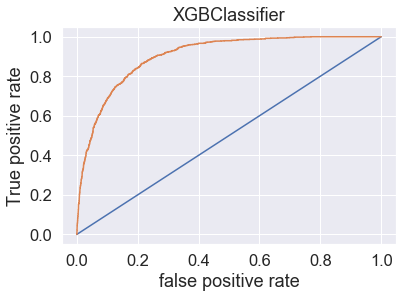

roc_auc_score =  0.9031131007148419


In [144]:
# Make predictions with probabilities
y_probs = xg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='XGBClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('XGBClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

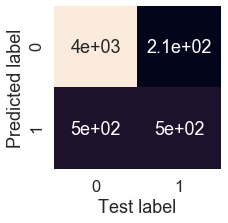

In [145]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predgxg):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predgxg),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predgxg)

In [146]:
#lets printed confusion_matrix
print(confusion_matrix(y_test, predgxg))

[[4048  212]
 [ 498  497]]


In [147]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predgxg
test
# On the lest side values are those fields which are taken by machine for test...

target  Predicted values
15289       0                 1
1579        0                 0
10834       1                 0
19021       0                 0
23694       0                 0
...       ...               ...
12220       1                 0
31048       0                 0
12499       0                 0
20177       0                 0
5260        0                 0

[5255 rows x 2 columns]

In [154]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(predgxg)
df1.to_csv('Project11_Censys_Income_submission.csv')

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (target) 

In [149]:
# Find feature importance of our best model
xg.feature_importances_

array([0.05823109, 0.01586377, 0.01274807, 0.03480259, 0.12543836,
       0.25910488, 0.03365725, 0.31267676, 0.01186827, 0.07350514,
       0.        , 0.        , 0.05127397, 0.01082988], dtype=float32)

In [155]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



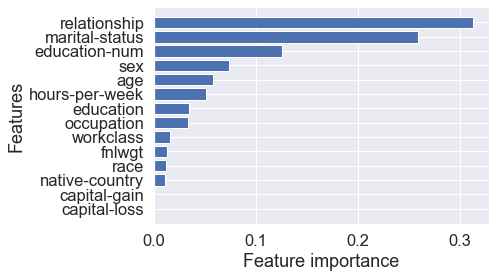

In [151]:
#bar plot of important features 
plot_features(x_train.columns, xg.feature_importances_)
#Looks like TV contribute the most.

In [152]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xg,'Project11_Censys_Income_submission.pkl')

['Project11_Censys_Income_submission.pkl']

In [153]:
#read the file using joblib
gbr_from_joblib=joblib.load('Project11_Censys_Income_submission.pkl')
joblib_y_preds = gbr_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.49%
Precision: 0.70
Recall: 0.50
F1 score: 0.58


{'accuracy': 0.86, 'precision': 0.7, 'recall': 0.5, 'f1': 0.58}

# Conclusion